General review:

https://genomebiology.biomedcentral.com/articles/10.1186/gb-2003-4-4-210

(doi:10.1186/gb-2003-4-4-210)

In [2]:
%matplotlib inline

In [3]:
import sys
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy.stats.stats import pearsonr
import scipy.stats.stats
import statsmodels.sandbox.stats.multicomp
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from scipy.stats import fisher_exact
from scipy import stats
from scipy.stats import linregress
import statsmodels.api as sm
from random import randint
import random 
from statsmodels.graphics.gofplots import qqplot_2samples
from statsmodels.graphics.gofplots import qqline
from scipy.stats import bartlett
from scipy.stats import levene
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import zscore
from scipy.stats.mstats import normaltest
from scipy.stats import mannwhitneyu

## Subtask 0: Download the data

hint:

http://science.sciencemag.org/highwire/filestream/680254/field_highwire_adjunct_files/5/aad0189_DataFileS5.xlsx

In [4]:
p = "/home/engelha/Documents/Praktikum/Integrated_Bioinformatics/notebooks/aad0189_DataFileS5.xlsx"

## Task 1: Data wrangling

hint:

http://www.arrayanalysis.org/main.html

### Subtask 1.1: Read in aad0189_DataFileS5.xlsx with pandas

In [5]:
data = pd.read_excel(p, header=2)

### Subtask 1.2: Average over different probesets for a gene and generate a dataframe containing each gene symbol (once)  as rows and the corresponding averaged expression values for each strain + condition as columns

In [6]:
data.drop("Unnamed: 6", 1, inplace=True)

In [7]:
data[0:15]

,Original_Order,MATCH_ORDER,Gene,Probeset,Gene.1,Protein,Range CD,Range HFD,Range_All,C57BL/6J_Liver_CD,...,BXD89_Liver_HFD,BXD90_Liver_HFD,BXD95_Liver_HFD,BXD96_Liver_HFD,BXD97_Liver_HFD,BXD98_Liver_HFD,BXD99_Liver_HFD,BXD100_Liver_HFD,BXD101_Liver_HFD,BXD103_Liver_HFD
0,12643,NaN,Igh,10403036,Igh,0,1.495886,1.720705,1.720705,5.138,...,4.959,5.483,5.347,5.087,5.125,5.160,5.020,5.170,4.775,4.982
1,12646,NaN,Igh,10403043,Igh,0,2.938337,1.988940,3.595021,7.983,...,7.415,7.252,7.547,7.358,7.424,7.447,7.567,7.732,7.365,7.369
2,12653,NaN,Igh,10403063,Igh,0,3.719220,1.859610,4.260433,7.169,...,6.665,6.948,6.999,6.974,6.886,6.876,7.027,7.093,6.748,6.771
3,8759,1458.0,Hcfc2,10365242,Hcfc2,A0AUN4,1.479388,1.465101,1.536875,9.241,...,9.177,9.021,8.803,8.928,8.914,8.838,9.056,8.924,8.945,8.865
4,18740,8191.0,Ccdc112,10458794,Ccdc112,A0AUP1,1.834008,1.943962,1.997229,6.761,...,6.623,6.371,6.187,6.310,6.448,6.531,6.167,6.401,6.470,6.565
5,16962,NaN,EG635895,10441899,EG635895,A0AUV4,1.937236,1.699370,2.168955,6.689,...,5.926,6.628,6.280,6.248,5.975,5.976,6.599,6.390,6.204,6.378
6,25569,12857.0,Srp72,10522676,Srp72,A0JLN1,1.582275,1.419123,1.584470,11.442,...,11.228,11.240,10.849,11.107,11.259,10.949,11.354,11.201,11.004,10.986
7,29717,15643.0,Ceacam15,10560294,Ceacam15,A0JLX4,1.773993,1.792533,1.835280,6.464,...,7.000,6.960,6.914,6.562,6.678,6.755,7.067,6.711,7.003,6.751
8,21302,10042.0,4930578N16Rik,10483536,4930578N16Rik,A0JLY1,1.534746,1.432962,1.726679,6.763,...,6.357,6.325,6.427,6.273,6.489,6.429,6.539,6.488,6.362,6.411
9,26618,13525.0,Ccdc64,10533007,Ccdc64,A0JNT9,1.655194,1.808759,1.808759,7.525,...,7.630,7.317,7.725,7.494,7.713,7.796,7.680,7.694,7.855,7.691


In [8]:
gene_average = data.groupby(data["Gene"], as_index=True, sort=False).mean()

In [9]:
gene_average[0:10]

,Original_Order,MATCH_ORDER,Probeset,Range CD,Range HFD,Range_All,C57BL/6J_Liver_CD,DBA/2J_Liver_CD,BXD43_Liver_CD,BXD44_Liver_CD,...,BXD89_Liver_HFD,BXD90_Liver_HFD,BXD95_Liver_HFD,BXD96_Liver_HFD,BXD97_Liver_HFD,BXD98_Liver_HFD,BXD99_Liver_HFD,BXD100_Liver_HFD,BXD101_Liver_HFD,BXD103_Liver_HFD
Gene,,,,,,,,,,,,,,,,,,,,,
Igh,12641.0,NaN,10403001.5,2.524014,1.780279,3.047875,6.92575,6.7715,6.79375,6.74325,...,6.47225,6.67875,6.76175,6.62375,6.633,6.6735,6.66275,6.7925,6.5245,6.52325
Hcfc2,8759.0,1458.0,10365242.0,1.479388,1.465101,1.536875,9.24100,8.9900,8.96700,8.68100,...,9.17700,9.02100,8.80300,8.92800,8.914,8.8380,9.05600,8.9240,8.9450,8.86500
Ccdc112,18740.0,8191.0,10458794.0,1.834008,1.943962,1.997229,6.76100,6.6560,6.72900,6.81300,...,6.62300,6.37100,6.18700,6.31000,6.448,6.5310,6.16700,6.4010,6.4700,6.56500
EG635895,16962.0,NaN,10441899.0,1.937236,1.699370,2.168955,6.68900,6.4560,6.52800,6.53800,...,5.92600,6.62800,6.28000,6.24800,5.975,5.9760,6.59900,6.3900,6.2040,6.37800
Srp72,25569.0,12857.0,10522676.0,1.582275,1.419123,1.584470,11.44200,11.3130,11.35900,11.06500,...,11.22800,11.24000,10.84900,11.10700,11.259,10.9490,11.35400,11.2010,11.0040,10.98600
Ceacam15,29717.0,15643.0,10560294.0,1.773993,1.792533,1.835280,6.46400,6.5460,6.57000,6.98700,...,7.00000,6.96000,6.91400,6.56200,6.678,6.7550,7.06700,6.7110,7.0030,6.75100
4930578N16Rik,21302.0,10042.0,10483536.0,1.534746,1.432962,1.726679,6.76300,6.4440,6.70100,6.79500,...,6.35700,6.32500,6.42700,6.27300,6.489,6.4290,6.53900,6.4880,6.3620,6.41100
Ccdc64,26618.0,13525.0,10533007.0,1.655194,1.808759,1.808759,7.52500,7.7470,7.81900,7.79100,...,7.63000,7.31700,7.72500,7.49400,7.713,7.7960,7.68000,7.6940,7.8550,7.69100
Aspg,12174.0,3901.0,10398795.0,2.830388,1.995845,2.859970,11.03600,10.8970,10.36100,10.80000,...,10.81000,10.68700,10.92100,10.85700,10.594,10.8380,11.08800,10.5250,10.6260,10.55800


In [10]:
len(gene_average)

21834

### Subtask 1.3: Quantile normalization: carry out a quantile normalization of the data (or not)

#### Subsubtask 1.3.1: Implement a ratio intensity plot (using matplotlib)

In [11]:
def ratio_plot(x, y):
    R = np.log10(x / y)
    I = (np.log10(x) + np.log10(y)) / 2

    plt.figure(figsize=(12,6), dpi=80)

    
    
    plt.scatter(I,R)
    
    plt.show()

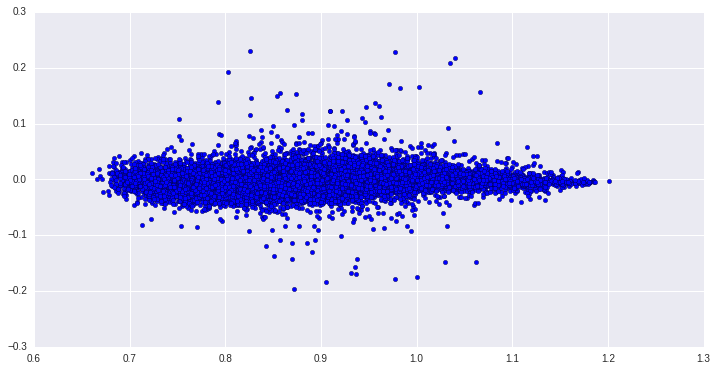

In [12]:
ratio_plot(gene_average["C57BL/6J_Liver_CD"], gene_average["DBA/2J_Liver_CD"])

#### Subsubtask 1.3.2: Apply your ratio intensity plot to several pairs of chips (columns of your above dataframe)

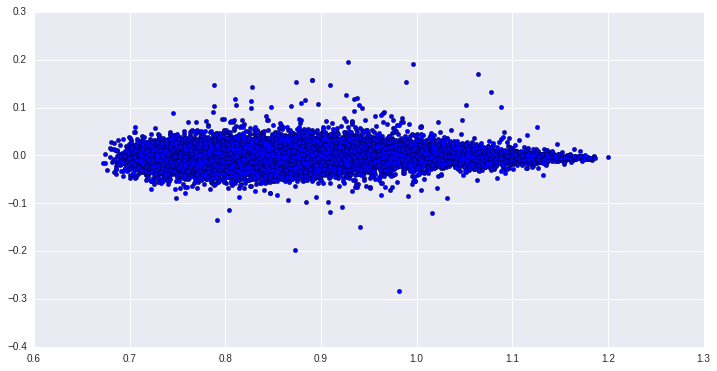

In [13]:
ratio_plot(gene_average["C57BL/6J_Liver_CD"], gene_average["BXD89_Liver_HFD"])

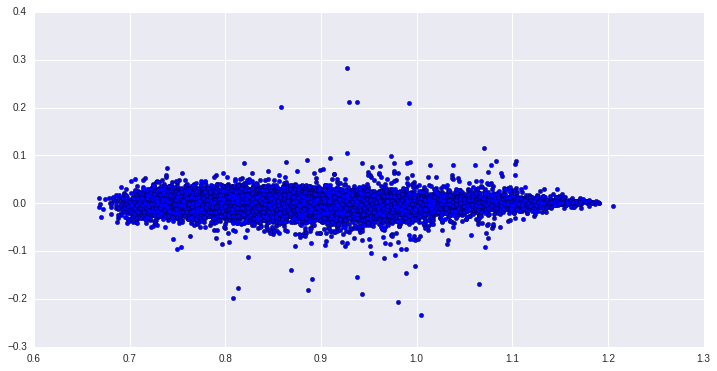

In [14]:
ratio_plot(gene_average["BXD103_Liver_HFD"], gene_average["BXD98_Liver_HFD"])

#### Subsubtask 1.3.3: Implement a rle plot (rle = relative log expression)

#### Subsubtask 1.3.4: Apply your RLE plot to the data

In [15]:
def rle_plot(gene_exp):
    genes = gene_exp.T / gene_exp.T.median()
    
  
    plt.figure(figsize=(16,12), dpi=80)
    plt.xlabel("Samples")
    plt.ylabel("Relative log expression")
    plt.xticks(range(len(gene_exp)), gene_exp.index, rotation="vertical")
    
    
    
    sns.boxplot(data=np.log10(genes.T))
    
    

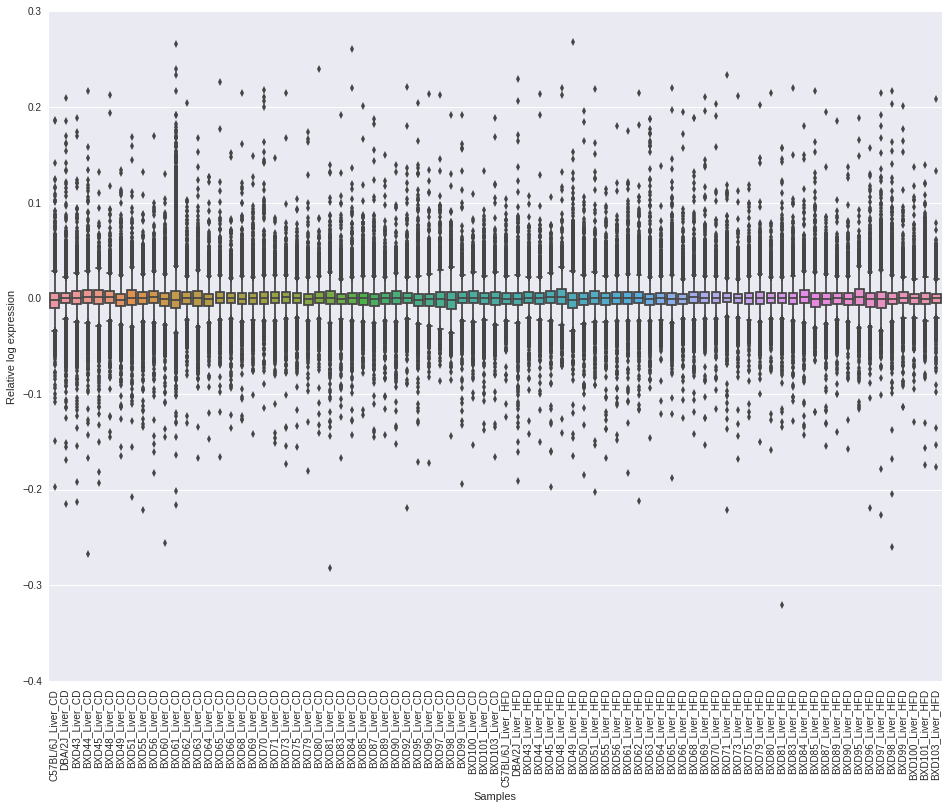

In [16]:
rle_plot(gene_average.drop("Unnamed: 51", axis=1).ix[:,6:])

#### Subsubtask 1.3.5: If you consider it necessary, perform a quantile normalization of the data 

The ratio-intensity plots and the rle-plot above indicate that the data is already normalized. Since the outliers are within a minimal range, we don't need a quantile normalization for further analysis. 

## Task 2: Which statistical test to chose?

We want to infer differentially expressed genes between the CD and the HFD condition. Therefore we (mis)(?)treat (!) the (already) normalized expression values of all the strains for a given condition as independent observations of the same sample. But first we need to figure out which statistical test for differential expression seems appropriate (concerning distribution and variance assumptions) and then apply it. Limit yourself to the Student t-test, the Welch t-test or Wilcoxon's rank-sum test (also sometimes refered to as Whitney-Mann U-test).

Everything you may need, is most likely found here:

http://docs.scipy.org/doc/scipy-0.17.1/reference/stats.html 

http://statsmodels.sourceforge.net/stable/graphics.html

### Subtask 2.1: Do the CD and HFD samples have equal variance?

Josef-Francisco Del-Marre-Doyle, famous and visionary president of the International BXD Society (IBXDS), just gave a celebrated TED-talk in which he reviewed the fact that any statistic associated with the universe is almost surely normally distributed, and hence you canonically assume that the only thing left to check is whether the samples have equal variance, that is whether to apply Student's or Welch's t-test. Josef-Francisco's assessment usually is that "things are equal" and so you're quite confident that you'll be able to use Student's t-test. But since you're an excellent scientist (and, additionally, won't pass the course otherwise) you still do the following certainly unnecessary work:

#### Subsubtask 2.1.1: Choose a random row of your latest dataframe using the random module of Python

In [15]:
li = list(gene_average.index)
r = random.randint(0,len(li))
rand_row = pd.DataFrame(gene_average.loc[li[r]]).T

r1 = pd.DataFrame([rand_row[col] for col in rand_row.columns if str(col).endswith("_CD")]).T
r2 = pd.DataFrame([rand_row[col] for col in rand_row.columns if str(col).endswith("_HFD")]).T
#del r1["BXD92_Liver_CD"]
r1_q = r1.quantile(0.1)
r2_q = r2.quantile(0.1)


#### Subsubtask 2.1.2: Make a Q-Q plot comparing the two samples for the just chosen gene and answer the question: Does this tell you anything?

In [16]:
def plot_QQ(data):
    li = list(gene_average.index)
    r = random.randint(0,len(li))
    rand_row = pd.DataFrame(gene_average.loc[li[r]]).T 
    r1 = pd.DataFrame([rand_row[col] for col in rand_row.columns if str(col).endswith("_CD")]).T
    r2 = pd.DataFrame([rand_row[col] for col in rand_row.columns if str(col).endswith("_HFD")]).T
    del r1["BXD92_Liver_CD"]
    r1_q = r1.quantile(0.1)
    r2_q = r2.quantile(0.1)
    
    plt.figure(figsize=(16,12),dpi=80)
    ax = plt.gca()
    qqplot_2samples(r1_q, r2_q, ax = ax)
    qqline(ax=ax, line="45", x=None, y=None, dist=None, fmt='r-')

    plt.xlabel("Quantiles of CD")
    plt.ylabel("Quantiles of HFD")
    plt.title("QQ Plot of CD vs HFD Diet")
    plt.show()

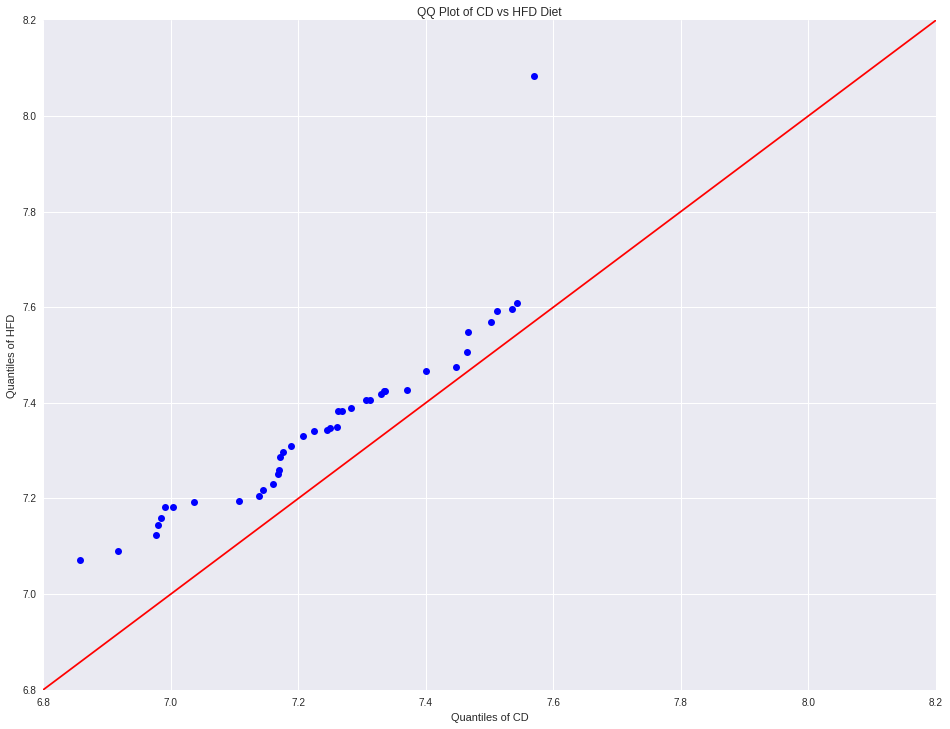

In [17]:
plot_QQ(gene_average)

$\Rightarrow$ The QQ-Plot shows a nearly equal distribution of Quantiles of the two Samples (CD and HFD). To clearify the equality of the two Quantile distributions, we need to perform a  statistical test for variance

#### Subsubtask 2.1.3: Apply an appropriate statistical test in order to figure out whether the samples have equal variance (there may be more than one sensible solution)

In [18]:
stats.ttest_ind(r1_q, r2_q)

Ttest_indResult(statistic=0.068824104995251989, pvalue=0.94530353735728534)

In [19]:
levene(r1_q, r2_q)

LeveneResult(statistic=0.021108038953342227, pvalue=0.88485506787421464)

In [20]:
bartlett(r1_q, r2_q)

BartlettResult(statistic=0.093684413168766995, pvalue=0.75954442339008787)

Since the three tests result in high p-values of more than $\alpha = 0.05$, we cannot reject the Null hypothesis and therefore we assume equal variance.

#### Subsubtask 2.1.4: To asses the global situation, plot a histogram of p-values for all the genes (using the same test you chose in 2.1.3)

In [21]:
d1 = pd.DataFrame([gene_average[col] for col in gene_average.columns if str(col).endswith("_CD")]).T
d2 = pd.DataFrame([gene_average[col] for col in gene_average.columns if str(col).endswith("_HFD")]).T
d1.drop("BXD92_Liver_CD", 1, inplace=True)

liss = []
for row in d1.index:
    tmp_t, tmp_p = bartlett(d1.loc[row], d2.loc[row])
    liss.append([row, tmp_p])

df_1 = pd.DataFrame(liss, columns=["Gene", "Bartlett_P_values"])
df_1.set_index("Gene", inplace=True)








In [22]:
df_1.head()

,Bartlett_P_values
Gene,
Igh,0.212231
Hcfc2,0.898837
Ccdc112,0.953147
EG635895,0.222291
Srp72,0.548411


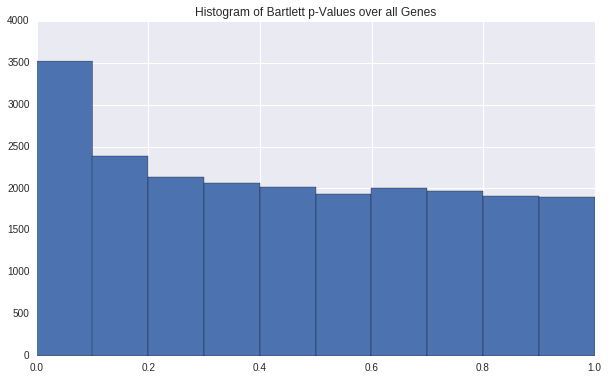

In [23]:
plt.figure(figsize=(10,6), dpi=80)
plt.hist(df_1["Bartlett_P_values"])
plt.title("Histogram of Bartlett p-Values over all Genes")

plt.show()

### Subtask 2.2 Are the CD and HFD samples normally distributed?

Utterly shocked and overwhelmed by ambiguous emotions you begin to doubt the wisdom of Josef-Francisco and start a top-secret and highly dangerous investigation whether the samples are at least normally distributed. Be careful whom you'll tell about that you're working on this...

#### Subsubtask 2.2.1: Using the same gene randomly chosen above, make a Box plot for the corresponding CD and HFD sample and give an interpretation

In [26]:
r1.rename(index={"Lcat" : "Lcat_CD"}, inplace=True)
r2.rename(index={"Lcat" : "Lcat_HFD"}, inplace=True)
df_re = r1.join(r2,how="outer")
df_re

,C57BL/6J_Liver_CD,DBA/2J_Liver_CD,BXD43_Liver_CD,BXD44_Liver_CD,BXD45_Liver_CD,BXD48_Liver_CD,BXD49_Liver_CD,BXD51_Liver_CD,BXD55_Liver_CD,BXD56_Liver_CD,...,BXD89_Liver_HFD,BXD90_Liver_HFD,BXD95_Liver_HFD,BXD96_Liver_HFD,BXD97_Liver_HFD,BXD98_Liver_HFD,BXD99_Liver_HFD,BXD100_Liver_HFD,BXD101_Liver_HFD,BXD103_Liver_HFD
Lcat_CD,13.449,13.702,13.706,13.876,13.709,13.836,13.67,13.809,13.811,13.808,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Lcat_HFD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,13.767,13.778,14.016,13.482,13.782,13.662,13.695,13.538,13.599,13.925


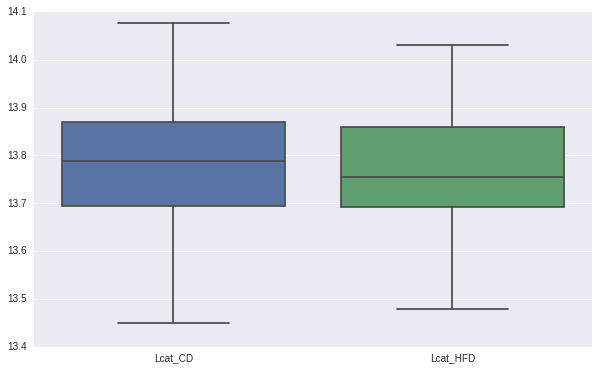

In [27]:
plt.figure(figsize=(10,6), dpi=80)
sns.boxplot(df_re.T, order=["Lcat_CD", "Lcat_HFD"])
plt.show()

The boxplot shows, that the Diets are not normally distributed. Therefore the median should be equal. Only for the "HFD" diet there could be a normal-like distribution in this case.

#### Subsubtask 2.2.2: Just like in 2.2.1 make Q-Q plots for each sample (compare each to the theoretical normal distribution) and try an interpretation.

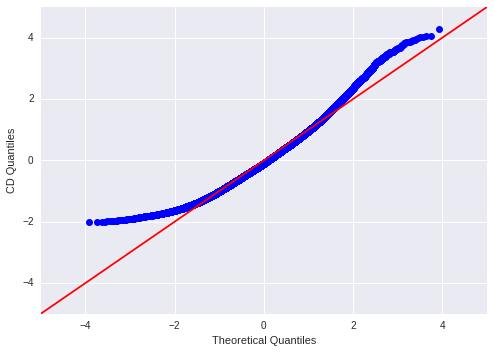

In [28]:
plt.figure(figsize=(16,12), dpi=80)
qqplot(zscore(d1["BXD100_Liver_CD"]), line="45")
plt.ylabel("CD Quantiles")
plt.show()

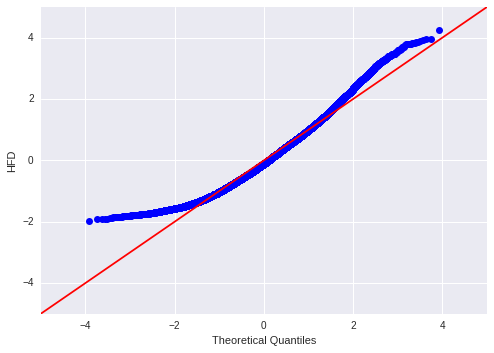

In [29]:
#s = np.random.normal(0, 0.1, 1000)
plt.figure(figsize=(16,12), dpi=80)
qqplot(zscore(d2["BXD100_Liver_HFD"]), line="45")
plt.ylabel("HFD")
plt.show()

#### Subsubtask 2.2.3: Apply an appropriate statistical test in order to figure out whether the samples are normally distributed (there may be more than one sensible solution)

In [30]:
print normaltest(r1.T)
print normaltest(r2.T)

NormaltestResult(statistic=masked_array(data = [0.4460077960856646],
             mask = [False],
       fill_value = 1e+20)
, pvalue=array([ 0.80011173]))
NormaltestResult(statistic=masked_array(data = [0.27741481170006854],
             mask = [False],
       fill_value = 1e+20)
, pvalue=array([ 0.87048269]))


In [31]:
listee = []
for row in d1.index:
    tmp_t, tmp_p = normaltest(d1.loc[row])
    listee.append([row, tmp_p])

gf_1 = pd.DataFrame(listee, columns=["Gene", "Norm_P_values"])
gf_1.set_index("Gene", inplace=True)

#### Subsubtask 2.2.4: To asses the global situation, plot a histogram of p-values for all the genes (using the same test you chose in 2.2.3)

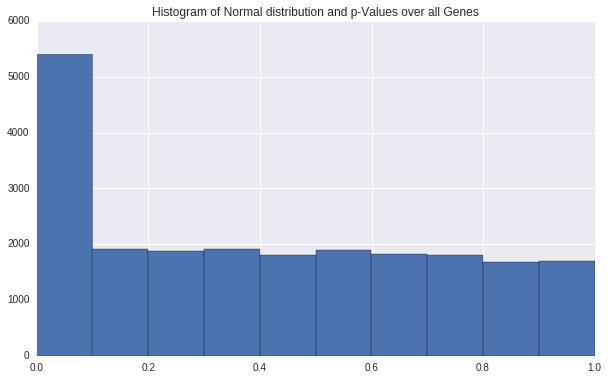

In [32]:
plt.figure(figsize=(10,6), dpi=80)
plt.hist(gf_1["Norm_P_values"])
plt.title("Histogram of Normal distribution and p-Values over all Genes")

plt.show()

#### Subsubtask 2.2.5: Write a 1-word essay about whether there is any instrinsic philosophical reason that any data follows a normal distribution

42

### Subtask 2.3 Choose a suitable statistical test to assess differential expression, apply it to every row, store the results in a suitable dataframe (you may want to order the genes with respect to their p-values) and finally extract a list of differentially expressed genes (5% significance). How many differentially expressed genes do you get?

In [128]:
diff_list = []


for row in d1.index:
    tmp_t, tmp_p = mannwhitneyu(d1.loc[row], d2.loc[row], use_continuity=True, alternative=None)
    diff_list.append([row, tmp_p])

diff_ex = pd.DataFrame(diff_list, columns=["Gene", "MannWhit_P_values"])
diff_ex.set_index("Gene", inplace=True)




In [129]:
#diff_ex.sort_values(by="MannWhit_P_values")
diff_exp_genes = diff_ex[diff_ex.ix[:,0] < 0.05]

In [130]:
len(diff_exp_genes)

13424

13424 Genes could be identified as differential expressed.

## Task 3: Multiple-testing correction

You receive an anonymous letter revealing to you that you should do multiple-testing correction, otherwise something awfully bad will happen, or not. Puzzled and shaking you embark on this endeavour.

Fredholm, your lab's vodoo priest, is convinced that applying anything else than Bonferroni correction brings death and destruction to the people on the moon. Opportunistically neglecting any potential societal consequences of your actions (technology is neutral after all and who cares about the moon anyway!) you're obsessed to try as many multiple testing procedures as possible.

Everything you may need, is most likely found here:

http://statsmodels.sourceforge.net/stable/stats.html#multiple-tests-and-multiple-comparison-procedures

### Subtask 3.1: For your official report you have to pretend to care about Bonferroni's correction (otherwise it will never pass through Fredholm's office): manually code it (do not use the statsmodels implementation for example) and store the results in a suitable dataframe. How many differentially expressed gene do you get?

In [131]:
customize_bonferroni = 0.05 / len(diff_ex)
diff_exp_genes_corrected = diff_ex[diff_ex.ix[:,0] < customize_bonferroni]
len(diff_exp_genes_corrected)

3096

After a manual correction of the p-values, 3096 Genes remain

### Subtask 3.2: Apply all multiple testing procedures you can get your hands on (except Bonferroni; now you should use statsmodels) to your uncorrected p-values and store the results in one (!) dataframe. 

In [132]:
def perform_mht_correction(pVals, confi, cor_method):
    rej, pvals_corr, n,m = statsmodels.sandbox.stats.multicomp.multipletests(pVals, confi,
                                                                             cor_method)
    corrected = pd.DataFrame([pvals_corr], index=[cor_method+"_p_Values_corrected"])
    corrected = corrected.T
    corrected = corrected.set_index(diff_ex.index)
    
    return corrected
    

In [133]:
correction_methods = ["bonferroni", "sidak", "holm-sidak", "holm", "simes-hochberg", 
                      "hommel", "fdr_bh", "fdr_by", "fdr_tsbh", "fdr_tsbky"]

In [134]:
tmpe = perform_mht_correction(diff_ex.MannWhit_P_values, 0.05, "sidak")

In [135]:
for entry in correction_methods:
    tmp = perform_mht_correction(diff_ex.MannWhit_P_values, 0.05, entry)
    diff_ex = diff_ex.join(tmp, how="inner")
   

### Subtask 3.3: External visual comparison of the different methods
1 Write the DE dataframe to a csv file.
2 add a row with either 'numeric' or 'factor' as the first row to describe the data schema and save the file
3 use [paco](http://parallelcoordinates.de/paco) to visualize your data in parallel coordinates
4 which of the multiple testing methods is the most stringent? What's the relation between the others?

In [65]:
u = pd.DataFrame([["numeric"]*len(diff_ex.columns)], columns = diff_ex.columns)
u_together = u.append(diff_ex)
u_together.to_csv("/home/engelha/Documents/Praktikum/Integrated_Bioinformatics/notebooks/Differential_Genes.csv", index=False)

The visualization in paco shows that the Bonferroni method is the most stringent. The visualization is done by setting up the pValues of every column to compare their direct values between columns.

### Subtask 3.4: Select a random method applied in 3.2 and extract the corresponding list of differentially expressed genes. Is this list contain more or less genes than the list from 2.3? Does it contain more or less genes than your Bonferroni list? ;)

In [66]:
diff_genes_new = diff_ex[diff_ex.ix[:,3] < 0.05]
len(diff_genes_new)

3181

The random chosen method, in this case the "Holm-Sidak" method, contains 3181 Genes in the remaining DataFrame. This amount is way smaller than the results from 2.3, but still higher than the results from the custom bonferroni method.

## Task 4: Vulcano plots

Marie de la Stratonovich, the devious intellectual opponent of your (former) beloved idol Josef-Francisco Del-Marre-Doyle just received the glorious Popel prize (the first marsian scientist ever to reveive that prize) for copy-pasting the content of the following papers:

1) arXiv:1103.3434 (https://arxiv.org/abs/1103.3434)

2) http://www.ncbi.nlm.nih.gov/pubmed/23602812 (doi:10.1016/j.compbiolchem.2013.02.003)

Overwhelmed by these achievments (and motivated by your ever declining esteem for Josef-Francisco) your're immensely excited about the joyous prospect of carrying out out the following tasks:

### Subtask 4.1: Add a log2 fold change column to the data frame from 3.2 and store it as a csv file.

In [79]:
hurz = []
for row in d1.index:
    a = d1.loc[row].mean()
    b = d2.loc[row].mean()
    res = a/b
    hurz.append([row ,np.log2(res)])
len(hurz)

21834

In [111]:
df_log2 = pd.DataFrame(hurz, columns=["Gene", "Log2_FoldChange"])
df_log2.set_index("Gene", inplace=True)
df_log2 = df_log2.join(diff_ex, how="inner")
df_log2.head()

,Log2_FoldChange,MannWhit_P_values,bonferroni_p_Values_corrected,sidak_p_Values_corrected,holm-sidak_p_Values_corrected,holm_p_Values_corrected,simes-hochberg_p_Values_corrected,hommel_p_Values_corrected,fdr_bh_p_Values_corrected,fdr_by_p_Values_corrected,fdr_tsbh_p_Values_corrected,fdr_tsbky_p_Values_corrected
Gene,,,,,,,,,,,,
Igh,0.036984,3.455967e-08,7.545759e-04,7.542913e-04,6.963077e-04,6.965502e-04,6.965157e-04,6.269470e-04,4.488851e-07,4.744026e-06,1.984149e-07,2.107534e-07
Hcfc2,0.019614,8.087184e-05,1.000000e+00,8.289547e-01,7.406464e-01,1.000000e+00,5.000000e-01,5.000000e-01,3.424985e-04,3.619682e-03,1.513902e-04,1.608044e-04
Ccdc112,0.077647,4.945441e-12,1.079788e-07,1.079798e-07,1.063428e-07,1.063418e-07,1.063418e-07,1.041658e-07,3.244404e-10,3.428836e-09,1.434082e-10,1.523261e-10
EG635895,0.065744,4.284527e-07,9.354836e-03,9.311218e-03,8.276260e-03,8.310697e-03,8.310697e-03,6.995775e-03,3.837094e-06,4.055219e-05,1.696061e-06,1.801531e-06
Srp72,0.000394,3.359962e-01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,5.000000e-01,5.000000e-01,3.750675e-01,1.000000e+00,1.657862e-01,1.760957e-01


In [95]:
df_log2.to_csv("/home/engelha/Documents/Praktikum/Integrated_Bioinformatics/notebooks/Diff_Genes_Log2FC.csv", index=False)

### Subtask 4.2:  Implement a Vulcano plot (from scratch using matplotlib)

In [141]:
def vulcano_plot(pval, fc):
    plt.figure(figsize=(12,6), dpi=80)
    X = fc
    Y = -(np.log10(pval))
    plt.scatter(X,Y)

    plt.show()

### Subtask 4.3: Apply your Volcano plot implementation to the uncorrected p-values, as well as the corrected p-values from 3.4 (you should have two plots in the end ;))

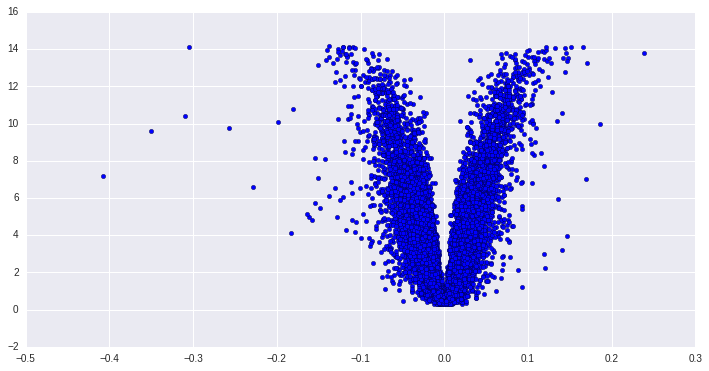

In [143]:
vulcano_plot(df_log2["MannWhit_P_values"], df_log2["Log2_FoldChange"])

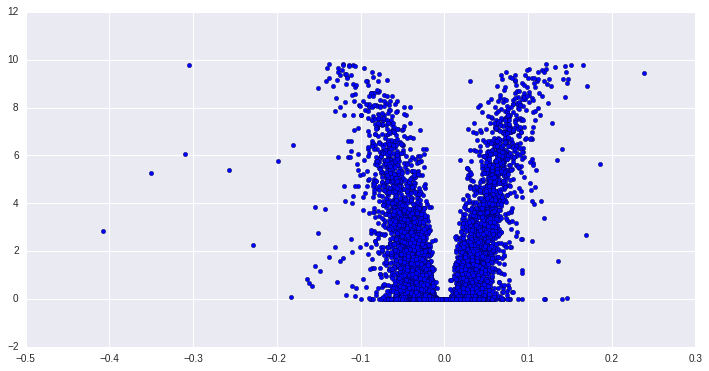

In [145]:
vulcano_plot(df_log2["sidak_p_Values_corrected"], df_log2["Log2_FoldChange"])

## Task 5: RNA-seq

There are faint rumours that some supposedly revolutionary technology could also be used to study gene expression. Find out the name of that technology and outline the most striking difference of that technology compared to microarrays from a statistical modeling point of view.